In [1]:
import sys, os

%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

import os
os.environ['R_HOME'] = 'D:/Program Files/R-4.5.0' #@TODO include in some setup file

from simulation_engine.scenarios.iv.binary_iv import BinaryIV
from simulation_engine.scenarios.iv.continuous_iv import ContinuousIV
from simulation_engine.scenarios.conf.binary_entropy_conf import BinaryEntropyConf
from simulation_engine.util.plotting_util import PlottingUtil
from simulation_engine.algorithms.causaloptim import Causaloptim
from simulation_engine.algorithms.zhang_bareinboim import ZhangBareinboim
from simulation_engine.algorithms.apid import Apid
from simulation_engine.algorithms.apid_src.src.models.apid import APID

import pandas as pd
pd.set_option('display.max_columns', None)

#disable warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from simulation_engine.algorithms.zaffalonbounds import ZaffalonBounds
from hydra import compose, initialize
from omegaconf import OmegaConf

C:\Users\tmari\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\TUM Workspace\Thesis Workspace\causal-bounds\simulation_engine\..\simulation_engine\algorithms\apid.py:233: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  @hydra.main(config_name=f'config.yaml', config_path='./apid_src/config/')


In [27]:
h_targets = [0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]
results = {}

for h in h_targets:
    data = BinaryEntropyConf.generate_data_rolling_ate(100, uniform_confounder_entropy=True, noise=False, h_target=h)
    scenario = BinaryEntropyConf(data)
    ATE_algs = ['ATE_tianpearl', 'ATE_entropybounds-trueTheta']
    PNS_algs = ['PNS_tianpearl', 'PNS_entropybounds-trueTheta']
    algs = ATE_algs + PNS_algs
    scenario.run(algs)
    scenario.data
    results[h] = scenario.data

results_df = pd.concat(results.values(), ignore_index=True)
results_df

Running ATE_tianpearl...
ATE_tianpearl completed in 0.08 seconds.
Running ATE_entropybounds-trueTheta...


C:\Users\tmari\AppData\Roaming\Python\Python312\site-packages\cvxpy\problems\problem.py:1504: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


ATE_entropybounds-trueTheta completed in 27.99 seconds.
Running PNS_tianpearl...
PNS_tianpearl completed in 0.04 seconds.
Running PNS_entropybounds-trueTheta...


C:\Users\tmari\AppData\Roaming\Python\Python312\site-packages\cvxpy\problems\problem.py:1504: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


PNS_entropybounds-trueTheta completed in 17.59 seconds.
Total runtime: 45.70 seconds.
Running ATE_tianpearl...
ATE_tianpearl completed in 0.05 seconds.
Running ATE_entropybounds-trueTheta...
ATE_entropybounds-trueTheta completed in 10.75 seconds.
Running PNS_tianpearl...
PNS_tianpearl completed in 0.03 seconds.
Running PNS_entropybounds-trueTheta...
PNS_entropybounds-trueTheta completed in 6.08 seconds.
Total runtime: 16.91 seconds.
Running ATE_tianpearl...
ATE_tianpearl completed in 0.04 seconds.
Running ATE_entropybounds-trueTheta...
ATE_entropybounds-trueTheta completed in 9.52 seconds.
Running PNS_tianpearl...
PNS_tianpearl completed in 0.05 seconds.
Running PNS_entropybounds-trueTheta...
PNS_entropybounds-trueTheta completed in 6.18 seconds.
Total runtime: 15.79 seconds.
Running ATE_tianpearl...
ATE_tianpearl completed in 0.05 seconds.
Running ATE_entropybounds-trueTheta...


C:\Users\tmari\AppData\Roaming\Python\Python312\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\tmari\AppData\Roaming\Python\Python312\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Error in LDL factorization when computing the nonzero elements. The problem seems to be non-convex.
factor_status: 0, num_vars: 8
Error in LDL initial factorization.
ERROR: init_lin_sys_work failure
ATE_entropybounds-trueTheta completed in 10.76 seconds.
Running PNS_tianpearl...
PNS_tianpearl completed in 0.05 seconds.
Running PNS_entropybounds-trueTheta...
PNS_entropybounds-trueTheta completed in 4.88 seconds.
Total runtime: 15.75 seconds.
Running ATE_tianpearl...
ATE_tianpearl completed in 0.04 seconds.
Running ATE_entropybounds-trueTheta...
ATE_entropybounds-trueTheta completed in 10.60 seconds.
Running PNS_tianpearl...
PNS_tianpearl completed in 0.04 seconds.
Running PNS_entropybounds-trueTheta...
PNS_entropybounds-trueTheta completed in 5.28 seconds.
Total runtime: 15.97 seconds.
Running ATE_tianpearl...
ATE_tianpearl completed in 0.04 seconds.
Running ATE_entropybounds-trueTheta...
ATE_entropybounds-trueTheta completed in 8.83 seconds.
Running PNS_tianpearl...
PNS_tianpearl compl

,seed,intercept_X,intercept_Y,b_U_X,b_X_Y,b_U_Y,ATE_true,PNS_true,p_Y1_mean,p_Y0_mean,p_U,U,X,Y,epsilon_X,epsilon_Y,noise,entropy_U,entropy_X,entropy_Y,squasher_X_name,squasher_Y_name,heteroskedasticity_structure,ATE_tianpearl_bound_lower,ATE_tianpearl_bound_upper,ATE_tianpearl_bound_width,ATE_tianpearl_bound_failed,ATE_tianpearl_bound_valid,ATE_entropybounds-trueTheta_bound_lower,ATE_entropybounds-trueTheta_bound_upper,ATE_entropybounds-trueTheta_bound_valid,ATE_entropybounds-trueTheta_bound_width,ATE_entropybounds-trueTheta_bound_failed,ATE_entropybounds-trueTheta_theta,PNS_tianpearl_bound_lower,PNS_tianpearl_bound_upper,PNS_tianpearl_bound_width,PNS_tianpearl_bound_failed,PNS_tianpearl_bound_valid,PNS_entropybounds-trueTheta_bound_lower,PNS_entropybounds-trueTheta_bound_upper,PNS_entropybounds-trueTheta_bound_valid,PNS_entropybounds-trueTheta_bound_width,PNS_entropybounds-trueTheta_bound_failed,PNS_entropybounds-trueTheta_theta
0,218856,1.022209,-1.048117,-0.742683,-5.00000,1.251703,-0.578927,3.373293e-07,8.044291e-07,0.578928,0.994393,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,0.037622,0.960818,0.745288,probit,probit,"sigma_i ~ |N(0,1)| for each unit",-1.000000,-0.104167,0.895833,False,True,-0.639444,-0.333892,True,0.305552,False,0.037622,0.0,0.172,0.172,False,True,1.299916e-09,0.027266,True,0.027266,False,0.037622
1,708218,0.220549,0.801259,1.357551,-4.89899,0.144878,-0.701279,5.266666e-03,1.881817e-02,0.720097,0.994393,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,0.067222,0.648472,0.546365,sigmoid,sigmoid,"sigma_i ~ |N(0,1)| for each unit",-0.971223,-0.373494,0.597729,False,True,-0.786655,-0.151240,True,0.635416,False,0.067222,0.0,0.064,0.064,False,True,0.000000e+00,0.052450,True,0.052450,False,0.067222
2,391740,2.314865,-0.001100,-0.847944,-4.79798,1.459684,-0.944745,6.424979e-05,1.248592e-03,0.945993,0.994393,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, ...","[0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, ...","[1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,0.052915,0.949124,0.939313,softplus,tanh_scaled,"sigma_i ~ |N(0,1)| for each unit",-0.993671,-0.923913,0.069758,False,True,-0.666312,-0.287304,False,0.379008,False,0.052915,0.0,0.016,0.016,False,True,8.063046e-10,0.045981,True,0.045981,False,0.052915
3,910813,0.630191,0.425569,-0.272651,-4.69697,0.899591,-0.755856,6.959070e-03,3.307169e-02,0.788928,0.994393,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, ...","[1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,0.052915,0.988149,0.962170,sigmoid,sigmoid,"sigma_i ~ |N(0,1)| for each unit",-0.900709,-0.642202,0.258507,False,True,-0.618992,-0.224623,False,0.394370,False,0.052915,0.0,0.106,0.106,False,True,0.000000e+00,0.136235,True,0.136235,False,0.052915
4,666770,-0.095880,0.136894,0.912750,-4.59596,0.821507,-0.535746,1.105279e-02,2.520698e-02,0.560953,0.994393,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,0.067222,0.709765,0.551928,probit,softplus,"sigma_i ~ |N(0,1)| for each unit",-0.950372,-0.113402,0.836970,False,True,-0.756568,-0.155177,True,0.601392,False,0.067222,0.0,0.106,0.106,False,True,

In [10]:
results[0.05].head(1)

,seed,intercept_X,intercept_Y,b_U_X,b_X_Y,b_U_Y,ATE_true,PNS_true,p_Y1_mean,p_Y0_mean,p_U,U,X,Y,epsilon_X,epsilon_Y,noise,entropy_U,entropy_X,entropy_Y,squasher_X_name,squasher_Y_name,heteroskedasticity_structure,ATE_tianpearl_bound_lower,ATE_tianpearl_bound_upper,ATE_tianpearl_bound_width,ATE_tianpearl_bound_failed,ATE_tianpearl_bound_valid,ATE_entropybounds-trueTheta_bound_lower,ATE_entropybounds-trueTheta_bound_upper,ATE_entropybounds-trueTheta_bound_valid,ATE_entropybounds-trueTheta_bound_width,ATE_entropybounds-trueTheta_bound_failed,ATE_entropybounds-trueTheta_theta,PNS_tianpearl_bound_lower,PNS_tianpearl_bound_upper,PNS_tianpearl_bound_width,PNS_tianpearl_bound_failed,PNS_tianpearl_bound_valid,PNS_entropybounds-trueTheta_bound_lower,PNS_entropybounds-trueTheta_bound_upper,PNS_entropybounds-trueTheta_bound_valid,PNS_entropybounds-trueTheta_bound_width,PNS_entropybounds-trueTheta_bound_failed,PNS_entropybounds-trueTheta_theta
0,531154,0.75526,-0.605206,0.015895,-5.0,-1.60087,-0.014725,3.054710e-11,4.188833e-11,0.014725,0.994393,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,0.037622,0.883722,-0.0,sigmoid,probit,"sigma_i ~ |N(0,1)| for each unit",-1.0,1.0,2.0,False,True,-0.666022,-0.312621,False,0.353401,False,0.037622,0.0,0.302,0.302,False,True,0.0,0.0218,True,0.0218,False,0.037622


### Bar chart with invalids

In [ ]:
import pandas as pd
from IPython.display import display

tighter_df = pd.DataFrame()

for h in h_targets:
    n = len(results[h])
    h_df = pd.DataFrame({'h': [h]*n})
    # if ATE_entropybounds-trueTheta is valid, not failed and ATE_entropybounds-trueTheta_bound_width is smaller than ATE_tianpearl_bound_width
    # then ATE_winner is ATE_entropybounds-trueTheta
    # if both are failed or invalid, then ATE_winner is None
    # else the ATE_winner is ATE_tianpearl
    h_df['ATE_winner'] = results[h].apply(
        lambda row: 'ATE_entropybounds-trueTheta' if (row['ATE_entropybounds-trueTheta_bound_width'] < row['ATE_tianpearl_bound_width']) else ('ATE_tianpearl')
        , axis=1).values
    h_df['PNS_winner'] = results[h].apply(
        lambda row: 'PNS_entropybounds-trueTheta' if (row['PNS_entropybounds-trueTheta_bound_width'] < row['PNS_tianpearl_bound_width']) else ('PNS_tianpearl')
        , axis=1).values
    
    h_df['ATE_entropybounds-trueTheta_bound_width'] = results[h]['ATE_entropybounds-trueTheta_bound_width']
    h_df['PNS_entropybounds-trueTheta_bound_width'] = results[h]['PNS_entropybounds-trueTheta_bound_width']
    h_df['ATE_tianpearl_bound_width'] = results[h]['ATE_tianpearl_bound_width']
    h_df['PNS_tianpearl_bound_width'] = results[h]['PNS_tianpearl_bound_width']
    
    
    #diagnostics
    h_df['entropy_U'] = results[h]['entropy_U']
    h_df['ATE_entropybounds-trueTheta_bound_valid'] = results[h]['ATE_entropybounds-trueTheta_bound_valid']
    h_df['PNS_entropybounds-trueTheta_bound_valid'] = results[h]['PNS_entropybounds-trueTheta_bound_valid']
    h_df['ATE_tianpearl_bound_valid'] = results[h]['ATE_tianpearl_bound_valid']
    h_df['PNS_tianpearl_bound_valid'] = results[h]['PNS_tianpearl_bound_valid']


    tighter_df = pd.concat([tighter_df, h_df], ignore_index=True)


with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(tighter_df)

,h,ATE_winner,PNS_winner,ATE_entropybounds-trueTheta_bound_width,PNS_entropybounds-trueTheta_bound_width,ATE_tianpearl_bound_width,PNS_tianpearl_bound_width,entropy_U,ATE_entropybounds-trueTheta_bound_valid,PNS_entropybounds-trueTheta_bound_valid,ATE_tianpearl_bound_valid,PNS_tianpearl_bound_valid
0,0.05,ATE_entropybounds-trueTheta,PNS_entropybounds-trueTheta,0.305552,0.027266,0.895833,0.172,0.037622,True,True,True,True
1,0.05,ATE_tianpearl,PNS_entropybounds-trueTheta,0.635416,0.052450,0.597729,0.064,0.067222,True,True,True,True
2,0.05,ATE_tianpearl,PNS_tianpearl,0.379008,0.045981,0.069758,0.016,0.052915,False,True,True,True
3,0.05,ATE_tianpearl,PNS_tianpearl,0.394370,0.136235,0.258507,0.106,0.052915,False,True,True,True
4,0.05,ATE_entropybounds-trueTheta,PNS_entropybounds-trueTheta,0.601392,0.071656,0.836970,0.106,0.067222,True,True,True,True
5,0.05,ATE_tianpearl,PNS_entropybounds-trueTheta,0.339519,0.043481,1.888372,0.406,0.052915,False,True,True,True
6,0.05,ATE_tianpearl,PNS_entropybounds-trueTheta,0.187491,0.072027,0.709136,0.246,0.020814,False,True,True,True
7,0.05,ATE_tianpearl,PNS_entropybounds-trueTheta,0.286704,0.042625,1.398211,0.314,0.037622,False,True,True,True
8,0.05,ATE_tianpearl,PNS_tianpearl,0.204231,0.017790,1.846847,0.410,0.020814,False,False,True,True
9,0.05,ATE_tianpearl,PNS_entropybounds-trueTheta,0.251403,0.012893,1.435583,0.234,0.020814,False,True,True,True


### Simple Bar Chart from Paper

In [41]:
import pandas as pd
from IPython.display import display

tighter_df = pd.DataFrame()

for h in h_targets:
    n = len(results[h])
    h_df = pd.DataFrame({'h': [h]*n})
    # if ATE_entropybounds-trueTheta is valid, not failed and ATE_entropybounds-trueTheta_bound_width is smaller than ATE_tianpearl_bound_width
    # then ATE_winner is ATE_entropybounds-trueTheta
    # if both are failed or invalid, then ATE_winner is None
    # else the ATE_winner is ATE_tianpearl
    h_df['ATE_winner'] = results[h].apply(
        lambda row: 'ATE_entropybounds-trueTheta' if (row['ATE_entropybounds-trueTheta_bound_valid'] and not row['ATE_entropybounds-trueTheta_bound_failed'] and row['ATE_entropybounds-trueTheta_bound_width'] < row['ATE_tianpearl_bound_width']) else (
            'ATE_tianpearl' if (row['ATE_tianpearl_bound_valid'] and not row['ATE_tianpearl_bound_failed']) else None
        ), axis=1).values
    h_df['PNS_winner'] = results[h].apply(
        lambda row: 'PNS_entropybounds-trueTheta' if (row['PNS_entropybounds-trueTheta_bound_valid'] and not row['PNS_entropybounds-trueTheta_bound_failed'] and row['PNS_entropybounds-trueTheta_bound_width'] < row['PNS_tianpearl_bound_width']) else (
            'PNS_tianpearl' if (row['PNS_tianpearl_bound_valid'] and not row['PNS_tianpearl_bound_failed']) else None
        ), axis=1).values
    
    #diagnostics
    h_df['entropy_U'] = results[h]['entropy_U']
    h_df['ATE_entropybounds-trueTheta_bound_valid'] = results[h]['ATE_entropybounds-trueTheta_bound_valid']
    h_df['PNS_entropybounds-trueTheta_bound_valid'] = results[h]['PNS_entropybounds-trueTheta_bound_valid']
    h_df['ATE_tianpearl_bound_valid'] = results[h]['ATE_tianpearl_bound_valid']
    h_df['PNS_tianpearl_bound_valid'] = results[h]['PNS_tianpearl_bound_valid']


    tighter_df = pd.concat([tighter_df, h_df], ignore_index=True)


with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(tighter_df)

,h,ATE_winner,PNS_winner,entropy_U,ATE_entropybounds-trueTheta_bound_valid,PNS_entropybounds-trueTheta_bound_valid,ATE_tianpearl_bound_valid,PNS_tianpearl_bound_valid
0,0.05,ATE_entropybounds-trueTheta,PNS_entropybounds-trueTheta,0.037622,True,True,True,True
1,0.05,ATE_tianpearl,PNS_entropybounds-trueTheta,0.067222,True,True,True,True
2,0.05,ATE_tianpearl,PNS_tianpearl,0.052915,False,True,True,True
3,0.05,ATE_tianpearl,PNS_tianpearl,0.052915,False,True,True,True
4,0.05,ATE_entropybounds-trueTheta,PNS_entropybounds-trueTheta,0.067222,True,True,True,True
5,0.05,ATE_tianpearl,PNS_entropybounds-trueTheta,0.052915,False,True,True,True
6,0.05,ATE_tianpearl,PNS_entropybounds-trueTheta,0.020814,False,True,True,True
7,0.05,ATE_tianpearl,PNS_entropybounds-trueTheta,0.037622,False,True,True,True
8,0.05,ATE_tianpearl,PNS_tianpearl,0.020814,False,False,True,True
9,0.05,ATE_tianpearl,PNS_entropybounds-trueTheta,0.020814,False,True,True,True


<Figure size 1000x600 with 0 Axes>

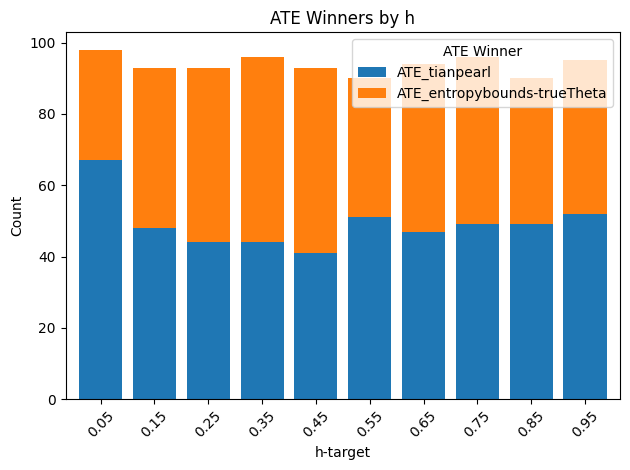

<Figure size 1000x600 with 0 Axes>

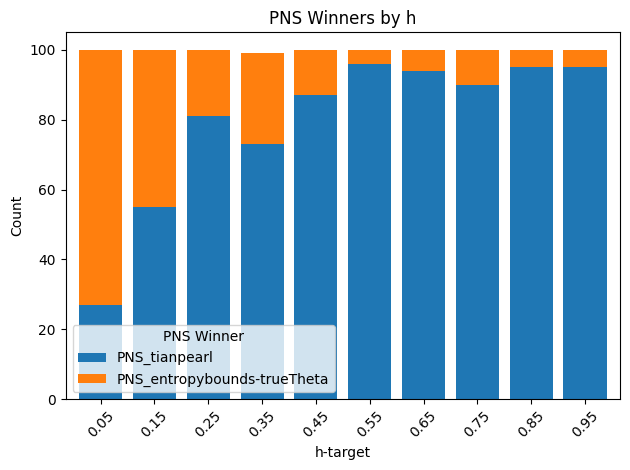

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Count winners per h for ATE
ate_counts = tighter_df.groupby(['h', 'ATE_winner']).size().unstack(fill_value=0)
ate_counts = ate_counts[['ATE_tianpearl', 'ATE_entropybounds-trueTheta']].fillna(0)

ate_counts

# Plot ATE winners
plt.figure(figsize=(10, 6))
ate_counts.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], width=0.8)
plt.title('ATE Winners by h')
plt.xlabel('h-target')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='ATE Winner')
plt.tight_layout()
plt.show()


# Count winners per h for PNS
pns_counts = tighter_df.groupby(['h', 'PNS_winner']).size().unstack(fill_value=0)
pns_counts = pns_counts[['PNS_tianpearl', 'PNS_entropybounds-trueTheta']].fillna(0)
# Plot PNS winners
plt.figure(figsize=(10, 6))
pns_counts.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], width=0.8)
plt.title('PNS Winners by h')
plt.xlabel('h-target')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='PNS Winner')
plt.tight_layout()
plt.show()

In [39]:
subset = scenario.data[scenario.data['entropy_U'] < 0.1]
subset.shape[0]

98

                  Algorithm Fail Rate (%) Invalid Rate (%) Net Bound Width Bound Width Invalid Δ (%)
ATE_entropybounds-trueTheta          0.00            52.04          0.5843      1.3210          8.12
              ATE_tianpearl          0.00             6.12          0.9787      1.0412          3.69


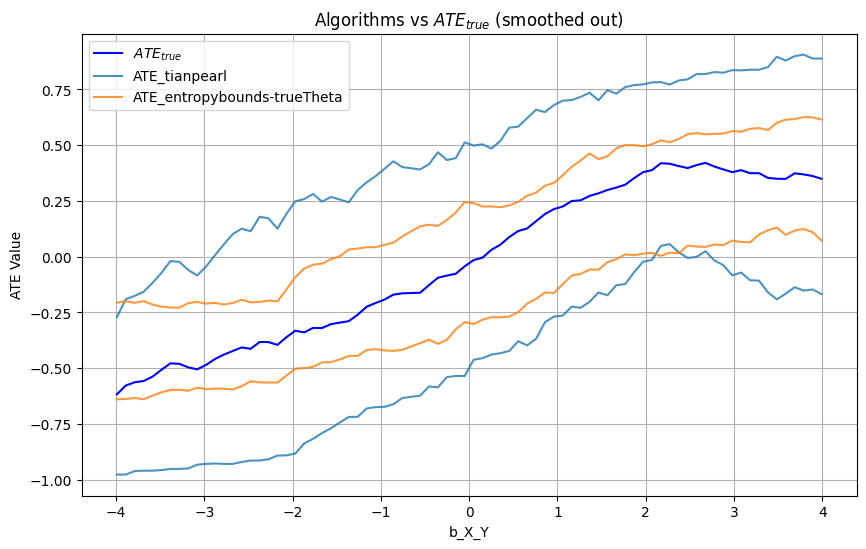

In [40]:
#ATE Evaluation
PlottingUtil.print_bound_statistics_table(subset, ATE_algs, 'ATE')
PlottingUtil.plot_smoothed_query_vs_bounds(subset, 'ATE', ATE_algs, 20)

                  Algorithm Fail Rate (%) Invalid Rate (%) Net Bound Width Bound Width Invalid Δ (%)
PNS_entropybounds-trueTheta          0.00             2.04          0.3688      0.3817          0.07
              PNS_tianpearl          0.00             0.00          0.4769      0.4769           N/A


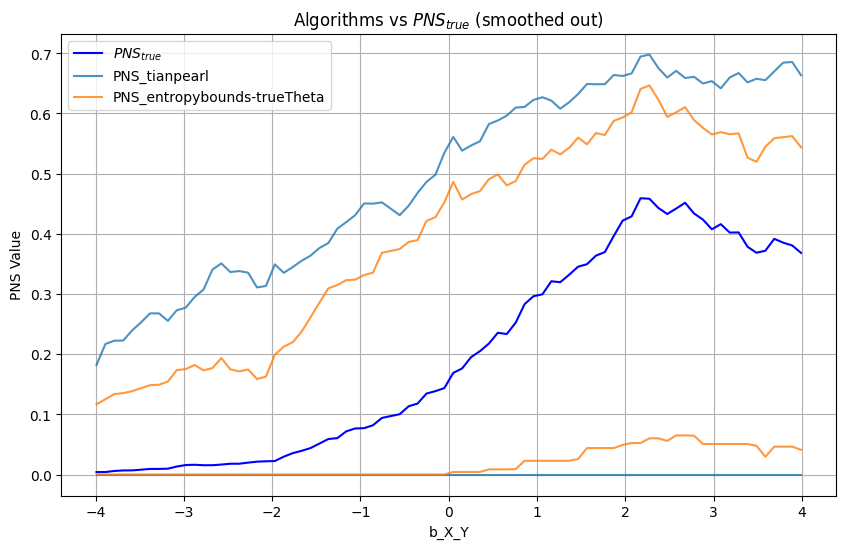

In [41]:
#PNS Evaluation
PlottingUtil.print_bound_statistics_table(subset, PNS_algs, 'PNS')
PlottingUtil.plot_smoothed_query_vs_bounds(subset, 'PNS', PNS_algs, 20)

In [20]:
# randomize b_X_Y as well
data = []
for i in range(2000):
    sim = BinaryIV._simulate_deterministic_data(uniform_confounder_entropy=True)
    data.append(sim)
data = pd.DataFrame(data)
binaryIV = BinaryIV('IV Dag', data)

In [11]:
data['entropy_U'].describe()

count    2000.000000
mean        0.505965
std         0.295366
min        -0.000000
25%         0.251388
50%         0.517753
75%         0.770973
max         0.999988
Name: entropy_U, dtype: float64

## Randomized entropy
* entropy(U) is randomized
* theta is set to true UB(entropy(U))


In [21]:
binaryIV.run(['ATE_entropybounds-trueTheta', 'ATE_tianpearl'])
binaryIV.run(['PNS_entropybounds-trueTheta', 'PNS_tianpearl'])
results = binaryIV.data


Running ATE_entropybounds-trueTheta...


C:\Users\tmari\AppData\Roaming\Python\Python312\site-packages\cvxpy\problems\problem.py:1504: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


ATE_entropybounds-trueTheta completed in 266.75 seconds.
Running ATE_tianpearl...
ATE_tianpearl completed in 0.71 seconds.
Total runtime: 267.46 seconds.
Running PNS_entropybounds-trueTheta...


C:\Users\tmari\AppData\Roaming\Python\Python312\site-packages\cvxpy\problems\problem.py:1504: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


PNS_entropybounds-trueTheta completed in 148.47 seconds.
Running PNS_tianpearl...
PNS_tianpearl completed in 0.83 seconds.
Total runtime: 149.31 seconds.


                  Algorithm Fail Rate (%) Invalid Rate (%) Net Bound Width Bound Width Invalid Δ (%)
              ATE_tianpearl          0.00            13.10          0.6378      0.8163          3.47
ATE_entropybounds-trueTheta          0.00             5.65          0.9251      0.9858          5.02
                 Generalized Linear Model Regression Results                  
Dep. Variable:        bound_width_tmp   No. Observations:                 1887
Model:                            GLM   Df Residuals:                     1884
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -232.56
Date:                Tue, 10 Jun 2025   Deviance:                       51.307
Time:                        18:40:04   Pearson chi2:                     62.4
No. Iterations:                     9   Pseudo R-squ. (CS):      

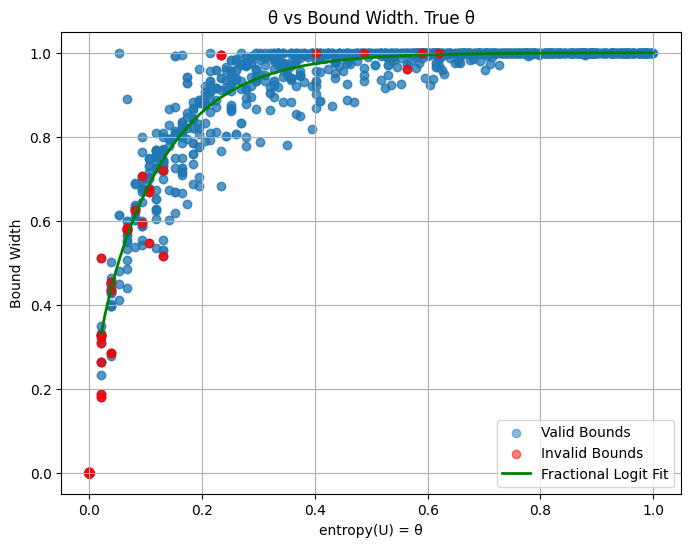

In [24]:
PlottingUtil.print_bound_statistics_table(results, ['ATE_entropybounds-trueTheta', 'ATE_tianpearl'], 'ATE')
PlottingUtil.plot_trueEntropyUB_vs_bound_width(results, 'ATE_entropybounds-trueTheta')


                  Algorithm Fail Rate (%) Invalid Rate (%) Net Bound Width Bound Width Invalid Δ (%)
              PNS_tianpearl          0.00             5.70          0.2643      0.3063          3.02
PNS_entropybounds-trueTheta          0.00             0.10          0.6789      0.6792          5.42
                 Generalized Linear Model Regression Results                  
Dep. Variable:        bound_width_tmp   No. Observations:                 1998
Model:                            GLM   Df Residuals:                     1995
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -840.34
Date:                Tue, 10 Jun 2025   Deviance:                       159.94
Time:                        18:41:12   Pearson chi2:                     158.
No. Iterations:                     4   Pseudo R-squ. (CS):      

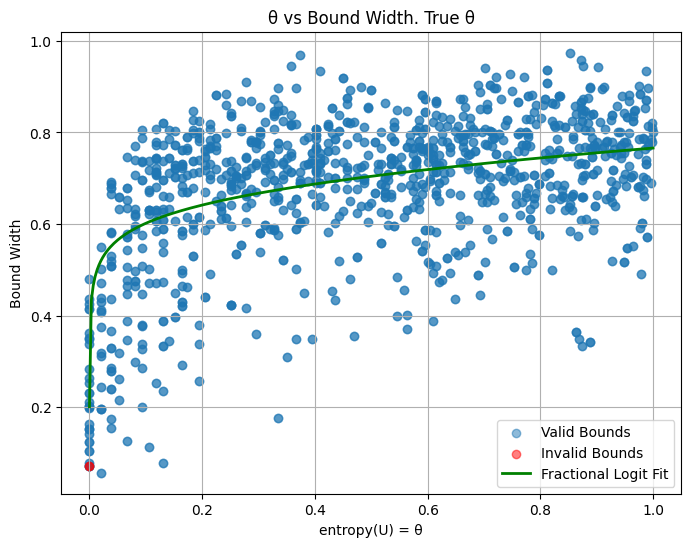

In [25]:
PlottingUtil.print_bound_statistics_table(results, ['PNS_entropybounds-trueTheta', 'PNS_tianpearl'], 'PNS')
PlottingUtil.plot_trueEntropyUB_vs_bound_width(results, 'PNS_entropybounds-trueTheta')


## Randomized Theta

In [84]:
data
binaryIV.run(['PNS_entropybounds-randomTheta'])
results_randomTheta = binaryIV.data

Running PNS_entropybounds-randomTheta...


d:\TUM Workspace\Thesis Workspace\causal-bounds\simulation_engine\..\simulation_engine\algorithms\entropybounds.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data.at[idx, f"{query}_entropybounds-{theta_rounded}_bound_width"] = bounds_width
d:\TUM Workspace\Thesis Workspace\causal-bounds\simulation_engine\..\simulation_engine\algorithms\entropybounds.py:66: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data.at[idx, f"{query}_entropybounds-{theta_rounded}_bound_failed"] = failed
d:\TUM Workspace\Thesis Workspace\causal-boun

PNS_entropybounds-randomTheta completed in 85.37 seconds.
Total runtime: 85.40 seconds.


In [22]:
#PNS Evaluation
PlottingUtil.print_bound_statistics_table(results, ['PNS_entropybounds-randomTheta'], 'PNS')


                    Algorithm Fail Rate (%) Invalid Rate (%) Net Bound Width Avg. Invalid dist.
PNS_entropybounds-randomTheta           N/A              N/A             N/A                N/A


                 Generalized Linear Model Regression Results                  
Dep. Variable:        bound_width_tmp   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1997
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -844.31
Date:                Tue, 10 Jun 2025   Deviance:                       146.53
Time:                        15:10:07   Pearson chi2:                     144.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01931
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2553      0.294      4.266      0.0

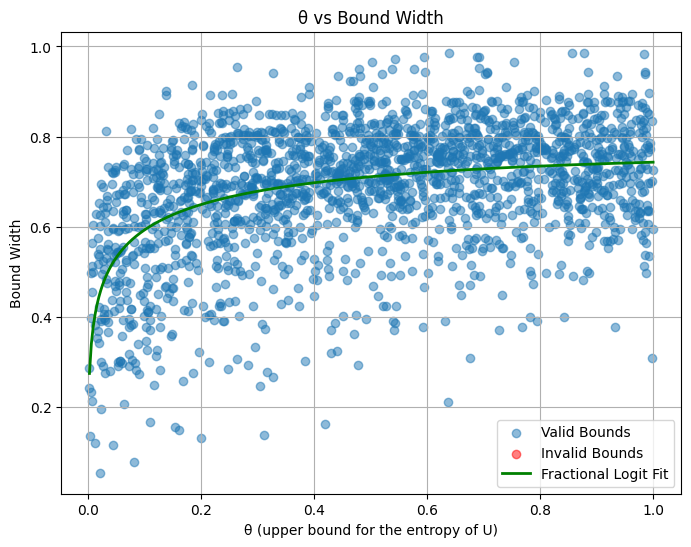

In [93]:
PlottingUtil.randomized_entropyUB_vs_bound_width(results, 'PNS_entropybounds-randomTheta')